# MVP_Bojado

## Imports

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Web Scraping Libraries
import urllib
import requests
from bs4 import BeautifulSoup

# Regex Library
import re

# Time-related Libraries
import time
from datetime import timedelta, datetime

# Geo-mapping Libraries
import geopandas
import geopy
import folium 

# NLP Libraries
import spacy
import unicodedata
import nltk
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.corpus import stopwords
from wordcloud import WordCloud

# Import .py files
import MVP_Shi

# Warnings
import warnings
warnings.filterwarnings("ignore")

# Acquire and Prepare

In [ ]:
# Acquired and Prepared Json file
df = pd.read_json("df_ds_tx_prepared.json") 
df.head()   

In [ ]:
df.info()

# Explore

In [ ]:
# Create a general library for all skills
general_library = ['python', 'sql', 'pandas','numpy','matplotlib','scikit learn','spark','hadoop',
           'aws','amazon web services','azure','microsoft word','microsoft excel','excel',
           'tableau','tensor flow','pytorch','hive', 'impala', 'matlab','etl',
           'statistics','exploration', 'extraction', 'data wrangling','math',
           'machine learning','data visualization','java','js',
           'javascript','scala','r','c','c++','power bi','dashboard','linear algebra',
           'calculus','neural networks','eda','big data','frameworks','database management',
           'testing hypotheses','probability','data mining','perl','nosql','saas','git',
           'github','natural language processing','nlp','deep learning','agile','kanban',
           'project management','julia','devops','google cloud','pytorch','computer vision',
           'critical thinking','communication','problem solving','teamwork','ethics','business acumen',
           'interpersonal skills','curiosity','storytelling','adaptability','team player','collaboration',
           'learning','time management','leadership','domain knowledge','creativity','decision making',
           'verbal communication','written communication'] 

In [ ]:
def top_general_skills_ds_v1(k):
    '''
    This function accepts a positive integer k and 
    returns a dataframe containing the top k skills needed
    for data scientist positions.
    '''
    # Load the prepared dataframe with job search results
    df = pd.read_json("df_ds_tx_prepared.json")
    # Create a string of all words that appear in the job description
    dic = MVP_Shi.words_variables_v1(df)
    # Compute the words frequency
    df_word_frequency = MVP_Shi.word_frequency_v1(dic)
    # Define a library that has a complete sillset for data scientist
    general_library = ['python', 'sql', 'pandas','numpy','matplotlib','scikit learn','spark','hadoop',
           'aws','amazon web services','azure','microsoft word','microsoft excel','excel',
           'tableau','tensor flow','pytorch','hive', 'impala', 'matlab','etl',
           'statistics','exploration', 'extraction', 'data wrangling','math',
           'machine learning','data visualization','java','js',
           'javascript','scala','r','c','c++','power bi','dashboard','linear algebra',
           'calculus','neural networks','eda','big data','frameworks','database management',
           'testing hypotheses','probability','data mining','perl','nosql','saas','git',
           'github','natural language processing','nlp','deep learning','agile','kanban',
           'project management','julia','devops','google cloud','pytorch','computer vision',
           'critical thinking','communication','problem solving','teamwork','ethics','business acumen',
           'interpersonal skills','curiosity','storytelling','adaptability','team player','collaboration',
           'learning','time management','leadership','domain knowledge','creativity','decision making',
           'verbal communication','written communication']
    # Create a empty dataframe to hold the rank of the skills
    df_skills = pd.DataFrame()
    # For loop through the library to find out the frequency of the skills mentioned in the job description
    for skill in general_library:
        mask = (df_word_frequency.index == skill)
        df = df_word_frequency[mask]
        df_skills = pd.concat([df_skills, df])
    df_skills.sort_values(by='frequency', ascending=False, inplace=True)
    return df_skills.head(k)

In [ ]:
df = top_general_skills_ds_v1(5)
df

In [ ]:
# Create a tech library
tech_library = ['python', 'sql', 'pandas','numpy','matplotlib','scikit learn','spark','hadoop',
           'aws','amazon web services','azure','microsoft word','microsoft excel','excel',
           'tableau','tensor flow','pytorch','hive', 'impala', 'matlab','etl',
           'statistics','exploration', 'extraction', 'data wrangling','math',
           'machine learning','data visualization','java','js',
           'javascript','scala','r','c','c++','power bi','dashboard','linear algebra',
           'calculus','neural networks','eda','big data','frameworks','database management',
           'testing hypotheses','probability','data mining','perl','nosql','saas','git',
           'github','natural language processing','nlp','deep learning','agile','kanban',
           'project management','julia','devops','google cloud','pytorch','computer vision']

In [ ]:
def top_tech_skills_ds_v1(k):
    '''
    This function accepts a positive integer k and 
    returns a dataframe containing the top k skills needed
    for data scientist positions.
    '''

    # Load the prepared dataframe with job search results
    df = pd.read_json("df_ds_tx_prepared.json")
    # Create a string of all words that appear in the job description
    dic = MVP_Shi.words_variables_v1(df)
    # Compute the words frequency
    df_word_frequency = MVP_Shi.word_frequency_v1(dic)
    # Define a library that has a complete sillset for data scientist
    tech_library = ['python', 'sql', 'pandas','numpy','matplotlib','scikit learn','spark','hadoop',
           'aws','amazon web services','azure','microsoft word','microsoft excel','excel',
           'tableau','tensor flow','pytorch','hive', 'impala', 'matlab','etl',
           'statistics','exploration', 'extraction', 'data wrangling','math',
           'machine learning','data visualization','java','js',
           'javascript','scala','r','c','c++','power bi','dashboard','linear algebra',
           'calculus','neural networks','eda','big data','frameworks','database management',
           'testing hypotheses','probability','data mining','perl','nosql','saas','git',
           'github','natural language processing','nlp','deep learning','agile','kanban',
           'project management','julia','devops','google cloud','pytorch','computer vision']
    # Create a empty dataframe to hold the rank of the skills
    df_skills = pd.DataFrame()
    # For loop through the library to find out the frequency of the skills mentioned in the job description
    for skill in tech_library:
        mask = (df_word_frequency.index == skill)
        df = df_word_frequency[mask]
        df_skills = pd.concat([df_skills, df])
    df_skills.sort_values(by='frequency', ascending=False, inplace=True)
    return df_skills.head(k)

In [ ]:
# Single word, top tech skills
df = top_tech_skills_ds_v1(5)
df

In [ ]:
# Create a soft skills library
soft_library = ['critical thinking','communication','problem solving','teamwork','ethics','business acumen',
           'interpersonal skills','curiosity','storytelling','adaptability','team player','collaboration',
           'learning','time management','leadership','domain knowledge','creativity','decision making',
           'verbal communication','written communication']

In [ ]:
def top_soft_skills_ds_v1(k):
    '''
    This function accepts a positive integer k and 
    returns a dataframe containing the top k skills needed
    for data scientist positions.
    '''

    # Load the prepared dataframe with job search results
    df = pd.read_json("df_ds_tx_prepared.json")
    # Create a string of all words that appear in the job description
    dic = MVP_Shi.words_variables_v1(df)
    # Compute the words frequency
    df_word_frequency = MVP_Shi.word_frequency_v1(dic)
    # Define a library that has a complete sillset for data scientist
    soft_library = ['critical thinking','communication','problem solving','teamwork','ethics','business acumen',
           'interpersonal skills','curiosity','storytelling','adaptability','team player','collaboration',
           'learning','time management','leadership','domain knowledge','creativity','decision making',
           'verbal communication','written communication']
    # Web scraped soft skills library to add
    df_online_list = pd.read_csv("soft_skills_cleaned")
    online_list = df_online_list['0'].to_list()
    # Combine both libraries
    combined_libraries = soft_library + online_list
    # Create a empty dataframe to hold the rank of the skills
    df_skills = pd.DataFrame()
    # For loop through the library to find out the frequency of the skills mentioned in the job description
    for skill in combined_libraries:
        mask = (df_word_frequency.index == skill)
        df = df_word_frequency[mask]
        df_skills = pd.concat([df_skills, df])
    df_skills.sort_values(by='frequency', ascending=False, inplace=True)
    return df_skills.head(k)

In [ ]:
# Single word, top soft skills
df = top_soft_skills_ds_v1(5)
df

# Time Series

In [2]:
# Acquired DS json file 
df_ds_ts = pd.read_json("df_ds_tx_prepared_backup.json") 
df_ds_ts.head() 

,date,title,company,company_rating,job_link,job_description,city,state,zipcode,clean
0,2021-02-23,Senior Data Scientist - ProServe,"Amazon Web Services, Inc.",3.6,https://www.indeed.com/rc/clk?jk=244b52fdf1a25...,\nBachelor’s degree in a highly quantitative f...,San Antonio,TX,0,bachelor degree highly quantitative field comp...
1,2021-02-23,Supply Chain Data Analyst,EthosEnergy Group,3.3,https://www.indeed.com/rc/clk?jk=83cbe651fdfb2...,Job Overview\nThe Supply Chain Data Analyst se...,Houston,TX,77092,job overview supply chain data analyst seek co...
2,2021-02-23,"Sr. Technical Product Manager, Digital Machine...",Apple,4.2,https://www.indeed.com/rc/clk?jk=c62329422529e...,"Summary\nPosted: Feb 22, 2021\nWeekly Hours: 4...",Austin,TX,0,summary posted feb 22 2021 weekly hour 40 role...
3,2021-02-23,Associate Data Scientist,Southwest Airlines Co.,4.3,https://www.indeed.com/rc/clk?jk=ca6fb6db72448...,Overview:\n\nSouthwest will provide a stable w...,Dallas,TX,75235,overview southwest provide stable work environ...
4,2021-02-23,Senior Data Scientist,Hewlett Packard Enterprise,3.8,https://www.indeed.com/rc/clk?jk=6cfebd31701b4...,Hewlett Packard Enterprise (HPE) advances the ...,Austin,TX,78758,hewlett packard enterprise hpe advance way peo...


In [3]:
df_ds_ts.shape 

(2234, 10)

In [4]:
df_ds_ts.dtypes

date               datetime64[ns]
title                      object
company                    object
company_rating            float64
job_link                   object
job_description            object
city                       object
state                      object
zipcode                     int64
clean                      object
dtype: object

In [5]:
df_ds_ts.isnull().sum() # number null values in each column

date               0
title              0
company            0
company_rating     0
job_link           0
job_description    0
city               0
state              0
zipcode            0
clean              0
dtype: int64

In [6]:
df_ds_ts['year'] = df_ds_ts.date.dt.year
df_ds_ts['month'] = df_ds_ts.date.dt.month
df_ds_ts['day'] = df_ds_ts.date.dt.day
df_ds_ts['weekday'] = df_ds_ts.date.dt.day_name()
df_ds_ts.head() 

,date,title,company,company_rating,job_link,job_description,city,state,zipcode,clean,year,month,day,weekday
0,2021-02-23,Senior Data Scientist - ProServe,"Amazon Web Services, Inc.",3.6,https://www.indeed.com/rc/clk?jk=244b52fdf1a25...,\nBachelor’s degree in a highly quantitative f...,San Antonio,TX,0,bachelor degree highly quantitative field comp...,2021,2,23,Tuesday
1,2021-02-23,Supply Chain Data Analyst,EthosEnergy Group,3.3,https://www.indeed.com/rc/clk?jk=83cbe651fdfb2...,Job Overview\nThe Supply Chain Data Analyst se...,Houston,TX,77092,job overview supply chain data analyst seek co...,2021,2,23,Tuesday
2,2021-02-23,"Sr. Technical Product Manager, Digital Machine...",Apple,4.2,https://www.indeed.com/rc/clk?jk=c62329422529e...,"Summary\nPosted: Feb 22, 2021\nWeekly Hours: 4...",Austin,TX,0,summary posted feb 22 2021 weekly hour 40 role...,2021,2,23,Tuesday
3,2021-02-23,Associate Data Scientist,Southwest Airlines Co.,4.3,https://www.indeed.com/rc/clk?jk=ca6fb6db72448...,Overview:\n\nSouthwest will provide a stable w...,Dallas,TX,75235,overview southwest provide stable work environ...,2021,2,23,Tuesday
4,2021-02-23,Senior Data Scientist,Hewlett Packard Enterprise,3.8,https://www.indeed.com/rc/clk?jk=6cfebd31701b4...,Hewlett Packard Enterprise (HPE) advances the ...,Austin,TX,78758,hewlett packard enterprise hpe advance way peo...,2021,2,23,Tuesday


In [7]:
# # Date made into the index
# df_ds_ts = df_ds_ts.set_index('date').sort_index()
# df_ds_ts.head()

In [8]:
# Start and end dates of current data 
df_ds_ts.index.min(), df_ds_ts.index.max()

(0, 2233)

In [48]:
# Creating a "NLP" kind search for a top skill
def ts_top_general_skills_ds(k):
    '''
    This function accepts a positive integer k and 
    returns a dataframe containing the top k skills needed
    for data scientist positions.
    '''
    # Load the prepared dataframe with job search results
    df = pd.read_json("df_ds_tx_prepared_backup.json")
    # Create a string of all words that appear in the job description
    dic = MVP_Shi.words_variables_v1(df)
    # Compute the words frequency
    df_word_frequency = MVP_Shi.everygram_frequency_v1(dic)
    # Define a library that has a complete sillset for data scientist
    general_library = ['python', 'sql', 'pandas','numpy','matplotlib','scikit learn','spark','hadoop',
           'aws','amazon web services','azure','microsoft word','microsoft excel','excel',
           'tableau','tensor flow','pytorch','hive', 'impala', 'matlab','etl',
           'statistics','exploration', 'extraction', 'data wrangling','math',
           'data visualization','java','js', 'machine learning', 'sagemaker','s3','glue','redshift',
           'javascript','scala','r','c','c++','power bi','dashboard','linear algebra',
           'calculus','neural networks','eda','big data','frameworks','database management',
           'testing hypotheses','probability','data mining','perl','nosql','saas','git',
           'github','natural language processing','nlp','deep learning','agile','kanban',
           'project management','julia','devops','google cloud','pytorch','computer vision',
           'critical thinking','communication','problem solving','teamwork','ethics','business acumen',
           'interpersonal skills','curiosity','storytelling','adaptability','team player','collaboration',
           'time management','leadership','domain knowledge','creativity','decision making',
           'verbal communication','written communication']
    # Create a empty dataframe to hold the rank of the skills
    df_skills = pd.DataFrame()
    # For loop through the library to find out the frequency of the skills mentioned in the job description
    for skill in general_library:
        mask = (df_word_frequency.index == skill)
        df = df_word_frequency[mask]
        df_skills = pd.concat([df_skills, df])
    df_skills.columns = dic.keys()
    df_skills.sort_values(by='frequency',ascending=False, inplace=True)
    return df_skills.head(k)

In [53]:
df_ds_top = ts_top_general_skills_ds(5)
df_ds_top

,frequency
machine learning,3392.0
python,1798.0
communication,1542.0
sql,1379.0
aws,1040.0


### Creating a column for Python 

In [11]:
df_ds_ts.head()

,date,title,company,company_rating,job_link,job_description,city,state,zipcode,clean,year,month,day,weekday
0,2021-02-23,Senior Data Scientist - ProServe,"Amazon Web Services, Inc.",3.6,https://www.indeed.com/rc/clk?jk=244b52fdf1a25...,\nBachelor’s degree in a highly quantitative f...,San Antonio,TX,0,bachelor degree highly quantitative field comp...,2021,2,23,Tuesday
1,2021-02-23,Supply Chain Data Analyst,EthosEnergy Group,3.3,https://www.indeed.com/rc/clk?jk=83cbe651fdfb2...,Job Overview\nThe Supply Chain Data Analyst se...,Houston,TX,77092,job overview supply chain data analyst seek co...,2021,2,23,Tuesday
2,2021-02-23,"Sr. Technical Product Manager, Digital Machine...",Apple,4.2,https://www.indeed.com/rc/clk?jk=c62329422529e...,"Summary\nPosted: Feb 22, 2021\nWeekly Hours: 4...",Austin,TX,0,summary posted feb 22 2021 weekly hour 40 role...,2021,2,23,Tuesday
3,2021-02-23,Associate Data Scientist,Southwest Airlines Co.,4.3,https://www.indeed.com/rc/clk?jk=ca6fb6db72448...,Overview:\n\nSouthwest will provide a stable w...,Dallas,TX,75235,overview southwest provide stable work environ...,2021,2,23,Tuesday
4,2021-02-23,Senior Data Scientist,Hewlett Packard Enterprise,3.8,https://www.indeed.com/rc/clk?jk=6cfebd31701b4...,Hewlett Packard Enterprise (HPE) advances the ...,Austin,TX,78758,hewlett packard enterprise hpe advance way peo...,2021,2,23,Tuesday


In [12]:
# def python_frequency(clean_job_description):
#     string = clean_job_description
#     matches = re.findall(r'python', string)
#     frequency = len(matches)
#     return frequency

In [13]:
# col_python = df_ds_ts.clean.apply(python_frequency)
# col_python.rename("python", inplace=True)

In [14]:
# df_ds_ts = pd.concat([df_ds_ts, col_python], axis=1)
# df_ds_ts.head()

In [15]:
# df_ds_ts.resample('W').python.sum().plot(marker='o') # need frequency
# plt.legend()
# plt.show()

### Creating columns for all top 5 skills

In [16]:
top5 = df_ds_top.index.to_list()
top5

['machine learning', 'python', 'communication', 'sql', 'aws']

In [17]:
dic_frequency = {}

for skill in top5:
    list_frequency = []
    for string in df_ds_ts.clean.values:
        matches = re.findall(f" {skill} ", string)
        frequency = len(matches)
        list_frequency.append(frequency)
        dic_frequency[skill]=list_frequency
    
dic_frequency.keys()

dict_keys(['machine learning', 'python', 'communication', 'sql', 'aws'])

In [18]:
df_frequency = pd.DataFrame(dic_frequency)
df_frequency.head()

,machine learning,python,communication,sql,aws
0,3,1,0,1,7
1,0,0,0,0,0
2,5,0,0,0,0
3,0,0,2,0,0
4,1,2,1,1,0


In [19]:
df_ds_ts.head()

,date,title,company,company_rating,job_link,job_description,city,state,zipcode,clean,year,month,day,weekday
0,2021-02-23,Senior Data Scientist - ProServe,"Amazon Web Services, Inc.",3.6,https://www.indeed.com/rc/clk?jk=244b52fdf1a25...,\nBachelor’s degree in a highly quantitative f...,San Antonio,TX,0,bachelor degree highly quantitative field comp...,2021,2,23,Tuesday
1,2021-02-23,Supply Chain Data Analyst,EthosEnergy Group,3.3,https://www.indeed.com/rc/clk?jk=83cbe651fdfb2...,Job Overview\nThe Supply Chain Data Analyst se...,Houston,TX,77092,job overview supply chain data analyst seek co...,2021,2,23,Tuesday
2,2021-02-23,"Sr. Technical Product Manager, Digital Machine...",Apple,4.2,https://www.indeed.com/rc/clk?jk=c62329422529e...,"Summary\nPosted: Feb 22, 2021\nWeekly Hours: 4...",Austin,TX,0,summary posted feb 22 2021 weekly hour 40 role...,2021,2,23,Tuesday
3,2021-02-23,Associate Data Scientist,Southwest Airlines Co.,4.3,https://www.indeed.com/rc/clk?jk=ca6fb6db72448...,Overview:\n\nSouthwest will provide a stable w...,Dallas,TX,75235,overview southwest provide stable work environ...,2021,2,23,Tuesday
4,2021-02-23,Senior Data Scientist,Hewlett Packard Enterprise,3.8,https://www.indeed.com/rc/clk?jk=6cfebd31701b4...,Hewlett Packard Enterprise (HPE) advances the ...,Austin,TX,78758,hewlett packard enterprise hpe advance way peo...,2021,2,23,Tuesday


In [20]:
df_ds_ts = pd.concat([df_ds_ts, df_frequency], axis=1)

In [21]:
df_ds_ts = df_ds_ts.set_index('date')
df_ds_ts.head()

,title,company,company_rating,job_link,job_description,city,state,zipcode,clean,year,month,day,weekday,machine learning,python,communication,sql,aws
date,,,,,,,,,,,,,,,,,,
2021-02-23,Senior Data Scientist - ProServe,"Amazon Web Services, Inc.",3.6,https://www.indeed.com/rc/clk?jk=244b52fdf1a25...,\nBachelor’s degree in a highly quantitative f...,San Antonio,TX,0,bachelor degree highly quantitative field comp...,2021,2,23,Tuesday,3,1,0,1,7
2021-02-23,Supply Chain Data Analyst,EthosEnergy Group,3.3,https://www.indeed.com/rc/clk?jk=83cbe651fdfb2...,Job Overview\nThe Supply Chain Data Analyst se...,Houston,TX,77092,job overview supply chain data analyst seek co...,2021,2,23,Tuesday,0,0,0,0,0
2021-02-23,"Sr. Technical Product Manager, Digital Machine...",Apple,4.2,https://www.indeed.com/rc/clk?jk=c62329422529e...,"Summary\nPosted: Feb 22, 2021\nWeekly Hours: 4...",Austin,TX,0,summary posted feb 22 2021 weekly hour 40 role...,2021,2,23,Tuesday,5,0,0,0,0
2021-02-23,Associate Data Scientist,Southwest Airlines Co.,4.3,https://www.indeed.com/rc/clk?jk=ca6fb6db72448...,Overview:\n\nSouthwest will provide a stable w...,Dallas,TX,75235,overview southwest provide stable work environ...,2021,2,23,Tuesday,0,0,2,0,0
2021-02-23,Senior Data Scientist,Hewlett Packard Enterprise,3.8,https://www.indeed.com/rc/clk?jk=6cfebd31701b4...,Hewlett Packard Enterprise (HPE) advances the ...,Austin,TX,78758,hewlett packard enterprise hpe advance way peo...,2021,2,23,Tuesday,1,2,1,1,0


### Reminder to Train, Test, Validate Data 

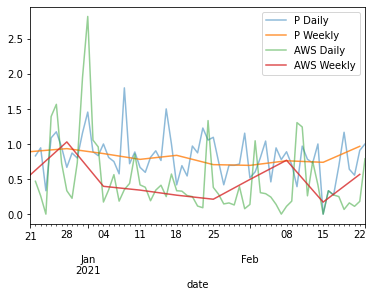

In [22]:
df_ds_ts.resample('D').python.mean().plot(alpha=.5, label='P Daily')
df_ds_ts.resample('W').python.mean().plot(alpha=.8, label='P Weekly')
df_ds_ts.resample('D').aws.mean().plot(alpha=.5, label='AWS Daily')
df_ds_ts.resample('W').aws.mean().plot(alpha=.8, label='AWS Weekly')
# df_ds_ts.resample('M').python.mean().plot(label='Montly')
# df_ds_ts.resample('Y').python.mean().plot(label='Yearly')
plt.legend()
plt.show()

### Function 

In [15]:
df_ds_top.index.to_list() 

['machine learning', 'python', 'communication', 'sql', 'aws']

In [17]:
def getDSSkills(df_ds_top,df_ds_ts):

    skill_list = df_ds_top.index.to_list()
    dic_frequency = {}

    for skill in skill_list:
        list_frequency = []
        for string in df_ds_ts.clean.values:
            matches = re.findall(f" {skill} ", string)
            frequency = len(matches)
            list_frequency.append(frequency)
            dic_frequency[skill]=list_frequency
    
    dic_frequency.keys()
    
    df_frequency = pd.DataFrame(dic_frequency)
    df_ds_ts = pd.concat([df_ds_ts, df_frequency], axis=1)
    df_ds_ts = df_ds_ts.set_index('date')

    return df_ds_ts

In [20]:
df_ds_ts = getDSSkills(df_ds_top,df_ds_ts)

In [25]:
df_ds_ts.head()

,title,company,company_rating,job_link,job_description,city,state,zipcode,clean,year,month,day,weekday,machine learning,python,communication,sql,aws
date,,,,,,,,,,,,,,,,,,
2021-02-23,Senior Data Scientist - ProServe,"Amazon Web Services, Inc.",3.6,https://www.indeed.com/rc/clk?jk=244b52fdf1a25...,\nBachelor’s degree in a highly quantitative f...,San Antonio,TX,0,bachelor degree highly quantitative field comp...,2021,2,23,Tuesday,3,1,0,1,7
2021-02-23,Supply Chain Data Analyst,EthosEnergy Group,3.3,https://www.indeed.com/rc/clk?jk=83cbe651fdfb2...,Job Overview\nThe Supply Chain Data Analyst se...,Houston,TX,77092,job overview supply chain data analyst seek co...,2021,2,23,Tuesday,0,0,0,0,0
2021-02-23,"Sr. Technical Product Manager, Digital Machine...",Apple,4.2,https://www.indeed.com/rc/clk?jk=c62329422529e...,"Summary\nPosted: Feb 22, 2021\nWeekly Hours: 4...",Austin,TX,0,summary posted feb 22 2021 weekly hour 40 role...,2021,2,23,Tuesday,5,0,0,0,0
2021-02-23,Associate Data Scientist,Southwest Airlines Co.,4.3,https://www.indeed.com/rc/clk?jk=ca6fb6db72448...,Overview:\n\nSouthwest will provide a stable w...,Dallas,TX,75235,overview southwest provide stable work environ...,2021,2,23,Tuesday,0,0,2,0,0
2021-02-23,Senior Data Scientist,Hewlett Packard Enterprise,3.8,https://www.indeed.com/rc/clk?jk=6cfebd31701b4...,Hewlett Packard Enterprise (HPE) advances the ...,Austin,TX,78758,hewlett packard enterprise hpe advance way peo...,2021,2,23,Tuesday,1,2,1,1,0


In [ ]:
# Sum: the total of times a word appears in the text
# Count: the total number of obeservations, for example in a column it can say word appears 7 times, 
# however that is only considered one observation
# Mean: it takes the observations / by the job posting for one week

# Static DS, Top General, Weekly Plot

## Mean Plot

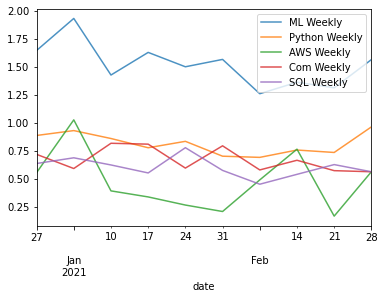

In [40]:
#### DEF a 1st iteration for the Time Series 
### Static function for (2)DS, (3)Top General, (5) Weekly
### How to show all this work on the back and front end

df_ds_ts.resample('W')['machine learning'].mean().plot(alpha=.8, label='ML Weekly')
df_ds_ts.resample('W').python.mean().plot(alpha=.8, label='Python Weekly')
df_ds_ts.resample('W').aws.mean().plot(alpha=.8, label='AWS Weekly')
df_ds_ts.resample('W').communication.mean().plot(alpha=.8, label='Com Weekly')
df_ds_ts.resample('W').sql.mean().plot(alpha=.8, label='SQL Weekly')

plt.legend()
plt.show() 

### Takeaways

- From the mean graph, we can tell that if a skill is hovering at 1, it indicates that the job is consistently mentioned in job posting, as oposed to it being less than 1. If >=2 its is being mentioned more per post. 

- What we can see in this example is that Python, Communication, and SQL are consistent while AWS is not always mentioned. 

- ML is being mentioned twice as much as Python and SQL.
- Python is a little less than 1, so is this because of R, and other competing languages??

## Sum Plot 

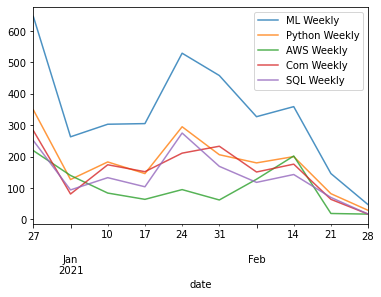

In [54]:
df_ds_ts.resample('W')['machine learning'].sum().plot(alpha=.8, label='ML Weekly')
df_ds_ts.resample('W').python.sum().plot(alpha=.8, label='Python Weekly')
df_ds_ts.resample('W').aws.sum().plot(alpha=.8, label='AWS Weekly')
df_ds_ts.resample('W').communication.sum().plot(alpha=.8, label='Com Weekly')
df_ds_ts.resample('W').sql.sum().plot(alpha=.8, label='SQL Weekly')

plt.legend()
plt.show() 

### Takeaways

- The sum total "count" of the skill posted for the week.
- We can see that ML, python, and SQL are trending together.
- There's also a trend with this graph and the plot below. 

## Count Plot 

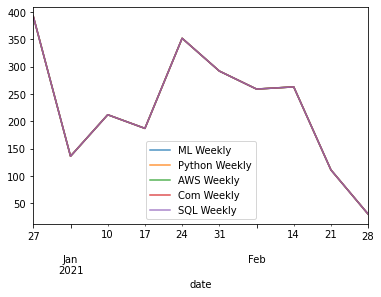

In [42]:
df_ds_ts.resample('W')['machine learning'].count().plot(alpha=.8, label='ML Weekly')
df_ds_ts.resample('W').python.count().plot(alpha=.8, label='Python Weekly')
df_ds_ts.resample('W').aws.count().plot(alpha=.8, label='AWS Weekly')
df_ds_ts.resample('W').communication.count().plot(alpha=.8, label='Com Weekly')
df_ds_ts.resample('W').sql.count().plot(alpha=.8, label='SQL Weekly')

plt.legend()
plt.show()

### Takeaways

- This is just the total number of job posting counted for that particular week. That is why it is the same all for skills.

- Theres a huge drop on the 28th of Feb, because at the time of making we haven't reached that date yet. 

# Time Series for WD

In [2]:
# Acquired WD json file
df_wd_ts = pd.read_json("df_wd_tx_prepared_backup.json") 
df_wd_ts.head() 

,date,title,company,company_rating,job_link,job_description,city,state,zipcode,clean
0,2021-02-23,UI AngularJS Bootstrap Developer,iboss,3.2,https://www.indeed.com/rc/clk?jk=7b562f4350e26...,Company Overview\niboss is a cloud security co...,Austin,TX,0,company overview iboss cloud security company ...
1,2021-02-23,Senior UI Developer – React,Cognizant Technology Solutions,0.0,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,Senior UI Developer – React Cognizant Interact...,Dallas-Fort Worth,TX,0,senior ui developer react cognizant interactiv...
2,2021-02-23,Security Engineer,Box,5.0,https://www.indeed.com/rc/clk?jk=de94237091d9c...,WHAT IS BOX?\nBox is the market leader for Clo...,Austin,TX,0,box box market leader cloud content management...
3,2021-02-23,Behavioral Health Therapist PHP - Full Time Da...,Texas Health Resources,3.9,https://www.indeed.com/rc/clk?jk=f010cad109fdd...,Texas Health H-E-B seeks to hire a Behavioral ...,Bedford,TX,76022,texas health heb seek hire behavioral health t...
4,2021-02-23,Full Stack Java Software Engineer,"JPMorgan Chase Bank, N.A.",3.9,https://www.indeed.com/rc/clk?jk=106f30609958b...,"Commercial Banking serves global clients, incl...",Plano,TX,0,commercial banking serf global client includin...


In [5]:
df_wd_ts.shape

(4285, 10)

In [6]:
df_wd_ts.isnull().sum() # number null values in each column

date               0
title              0
company            0
company_rating     0
job_link           0
job_description    0
city               0
state              0
zipcode            0
clean              0
dtype: int64

In [7]:
df_wd_ts['year'] = df_wd_ts.date.dt.year
df_wd_ts['month'] = df_wd_ts.date.dt.month
df_wd_ts['day'] = df_wd_ts.date.dt.day
df_wd_ts['weekday'] = df_wd_ts.date.dt.day_name()
df_wd_ts.head()

,date,title,company,company_rating,job_link,job_description,city,state,zipcode,clean,year,month,day,weekday
0,2021-02-23,UI AngularJS Bootstrap Developer,iboss,3.2,https://www.indeed.com/rc/clk?jk=7b562f4350e26...,Company Overview\niboss is a cloud security co...,Austin,TX,0,company overview iboss cloud security company ...,2021,2,23,Tuesday
1,2021-02-23,Senior UI Developer – React,Cognizant Technology Solutions,0.0,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,Senior UI Developer – React Cognizant Interact...,Dallas-Fort Worth,TX,0,senior ui developer react cognizant interactiv...,2021,2,23,Tuesday
2,2021-02-23,Security Engineer,Box,5.0,https://www.indeed.com/rc/clk?jk=de94237091d9c...,WHAT IS BOX?\nBox is the market leader for Clo...,Austin,TX,0,box box market leader cloud content management...,2021,2,23,Tuesday
3,2021-02-23,Behavioral Health Therapist PHP - Full Time Da...,Texas Health Resources,3.9,https://www.indeed.com/rc/clk?jk=f010cad109fdd...,Texas Health H-E-B seeks to hire a Behavioral ...,Bedford,TX,76022,texas health heb seek hire behavioral health t...,2021,2,23,Tuesday
4,2021-02-23,Full Stack Java Software Engineer,"JPMorgan Chase Bank, N.A.",3.9,https://www.indeed.com/rc/clk?jk=106f30609958b...,"Commercial Banking serves global clients, incl...",Plano,TX,0,commercial banking serf global client includin...,2021,2,23,Tuesday


In [8]:
def ts_top_general_skills_wd(k):
    '''
    This function accepts a positive integer k and 
    returns a dataframe containing the top k skills needed
    for data scientist positions.
    '''
    # Load the prepared dataframe with job search results
    df = pd.read_json("df_wd_tx_prepared_backup.json")
    # Create a string of all words that appear in the job description
    dic = MVP_Shi.words_variables_v1(df)
    # Compute the words frequency
    df_word_frequency = MVP_Shi.everygram_frequency_v1(dic)
    # Define a library that has a complete sillset for data scientist
    wd_general_library = ['html','css','javascript','debugging','git','github','libraries','frameworks','publishing web site',
    'photoshop','bootstrap','jquery','search engine optimization','seo','basic graphic design','front end','back end',
    'visual studio code','visual studio','figma','zeplin','sketch','gatspy','strapi','paint','canva','aws','azure',
    'amazon web services','sql','mysql','nosql','node','node.js','js','json','api','google charts','d3','d3.js','react',
    'angular','ember','vue','python','c','c++','ruby','ruby on rails','git','github','php','net','.net','java','c#',
    'linux','go','gcp','troubleshooting','problem solving','ux','ui','ux/ui','cloud computing','netlify','net''critical thinking',
    'communication','problem solving','teamwork','ethics','business acumen','interpersonal skills','curiosity',
    'storytelling','adaptability','team player','collaboration','time management','leadership','domain knowledge',
    'creativity','decision making','verbal communication','written communication','teamwork']
    # Create a empty dataframe to hold the rank of the skills
    df_skills = pd.DataFrame()
    # For loop through the library to find out the frequency of the skills mentioned in the job description
    for skill in wd_general_library:
        mask = (df_word_frequency.index == skill)
        df = df_word_frequency[mask]
        df_skills = pd.concat([df_skills, df])
    df_skills.columns = dic.keys()
    df_skills.sort_values(by='frequency',ascending=False, inplace=True)
    return df_skills.head(k)

In [24]:
df_wd_top = ts_top_general_skills_wd(5)
df_wd_top

,frequency
javascript,3438.0
communication,2488.0
java,2316.0
sql,2090.0
react,1849.0


In [10]:
def getWDSkills(df_top,df_wd_ts):

    skill_list = df_top.index.to_list()
    dic_frequency = {}

    for skill in skill_list:
        list_frequency = []
        for string in df_wd_ts.clean.values:
            matches = re.findall(f" {skill} ", string)
            frequency = len(matches)
            list_frequency.append(frequency)
            dic_frequency[skill]=list_frequency
    
    dic_frequency.keys()
    
    df_frequency = pd.DataFrame(dic_frequency)
    df_wd_ts = pd.concat([df_wd_ts, df_frequency], axis=1)
    df_wd_ts = df_wd_ts.set_index('date')

    return df_wd_ts

In [12]:
df_wd_ts = getWDSkills(df_wd_top,df_wd_ts)
df_wd_ts

,title,company,company_rating,job_link,job_description,city,state,zipcode,clean,year,month,day,weekday,javascript,communication,java,sql,react
date,,,,,,,,,,,,,,,,,,
2021-02-23,UI AngularJS Bootstrap Developer,iboss,3.2,https://www.indeed.com/rc/clk?jk=7b562f4350e26...,Company Overview\niboss is a cloud security co...,Austin,TX,0,company overview iboss cloud security company ...,2021,2,23,Tuesday,3,2,0,1,2
2021-02-23,Senior UI Developer – React,Cognizant Technology Solutions,0.0,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,Senior UI Developer – React Cognizant Interact...,Dallas-Fort Worth,TX,0,senior ui developer react cognizant interactiv...,2021,2,23,Tuesday,0,0,0,0,4
2021-02-23,Security Engineer,Box,5.0,https://www.indeed.com/rc/clk?jk=de94237091d9c...,WHAT IS BOX?\nBox is the market leader for Clo...,Austin,TX,0,box box market leader cloud content management...,2021,2,23,Tuesday,0,1,0,0,0
2021-02-23,Behavioral Health Therapist PHP - Full Time Da...,Texas Health Resources,3.9,https://www.indeed.com/rc/clk?jk=f010cad109fdd...,Texas Health H-E-B seeks to hire a Behavioral ...,Bedford,TX,76022,texas health heb seek hire behavioral health t...,2021,2,23,Tuesday,0,2,0,0,0
2021-02-23,Full Stack Java Software Engineer,"JPMorgan Chase Bank, N.A.",3.9,https://www.indeed.com/rc/clk?jk=106f30609958b...,"Commercial Banking serves global clients, incl...",Plano,TX,0,commercial banking serf global client includin...,2021,2,23,Tuesday,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-06,Full-Stack Web Developer with Front-End Focus,Quick Internet Software Solutions,4.5,https://www.indeed.com/company/Quick-Internet-...,A UI/Full Stack Web Developer is responsible f...,College Station,TX,0,uifull stack web developer responsible coding ...,2021,1,6,Wednesday,0,2,0,1,0
2021-01-05,Graphic Designer / Web Developer,"Wealth Watch Partners, Inc.",0.0,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,Wealth Watch Partners is in immediate need of ...,San Antonio,TX,78216,wealth watch partner immediate need inhouse gr...,2021,1,5,Tuesday,0,0,0,0,0
2021-01-05,Angular Web Developer,"Artemis Consulting, Inc.",0.0,https://www.indeed.com/rc/clk?jk=cab56f8a3b4b3...,POSITION OVERVIEW\nAngular Web Developer\n5+ y...,Austin,TX,73301,position overview angular web developer 5 year...,2021,1,5,Tuesday,2,3,1,0,1


# Static WD, Top General, Weekly

## Mean Plot

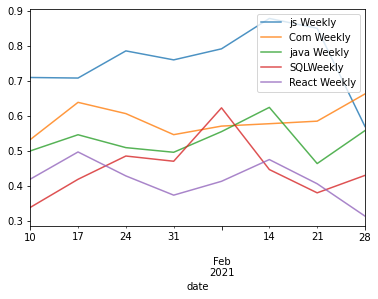

In [14]:
df_wd_ts.resample('W').javascript.mean().plot(alpha=.8, label='js Weekly')
df_wd_ts.resample('W').communication.mean().plot(alpha=.8, label='Com Weekly')
df_wd_ts.resample('W').java.mean().plot(alpha=.8, label='java Weekly')
df_wd_ts.resample('W').sql.mean().plot(alpha=.8, label='SQLWeekly')
df_wd_ts.resample('W').react.mean().plot(alpha=.8, label='React Weekly')

plt.legend()
plt.show()

In [23]:
# Possible reasonn for the under 1 issue
error_search = df_wd_ts.clean == 'error'
error_search.sum()

216

### Takeaways 

- Every top skill is under 1, so does this mean that there is more variability in what is expected for this career??
- Could this because of the 'error' that is showing up from the job posting text extraction

## Sum Plot

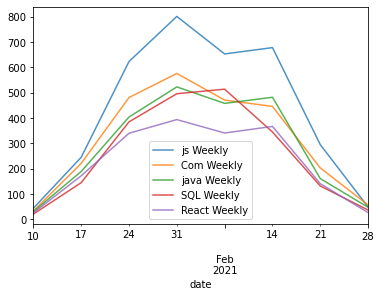

In [16]:
df_wd_ts.resample('W').javascript.sum().plot(alpha=.8, label='js Weekly')
df_wd_ts.resample('W').communication.sum().plot(alpha=.8, label='Com Weekly')
df_wd_ts.resample('W').java.sum().plot(alpha=.8, label='java Weekly')
df_wd_ts.resample('W').sql.sum().plot(alpha=.8, label='SQL Weekly')
df_wd_ts.resample('W').react.sum().plot(alpha=.8, label='React Weekly')

plt.legend()
plt.show()

### Takeaways 

- The time plot is different from what we have from the DS data 
- In the actual graphs we post on the website, the date should start on Jan 1st and always cut off the last week to prevent a "false" dip

## Count Plot

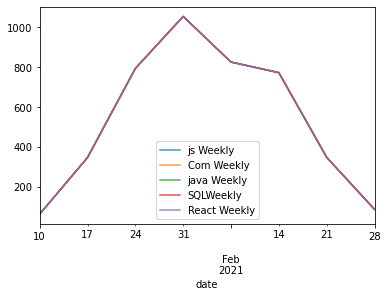

In [17]:
df_wd_ts.resample('W').javascript.count().plot(alpha=.8, label='js Weekly')
df_wd_ts.resample('W').communication.count().plot(alpha=.8, label='Com Weekly')
df_wd_ts.resample('W').java.count().plot(alpha=.8, label='java Weekly')
df_wd_ts.resample('W').sql.count().plot(alpha=.8, label='SQLWeekly')
df_wd_ts.resample('W').react.count().plot(alpha=.8, label='React Weekly')

plt.legend()
plt.show()

### Takeaways 

- It's basically the same as the graph above

# 4. Model

- Train Test Validate 

- What is going to be our target variable 
- Seasonality (this should be in Explore)


- Should be modeling if skills are going up or down in demand??
- How many job posting for the next week??
- Are there any skills that are having drastic shifts in comparsion to the other top skills? 
- Predict out a week, a month???

- We can see how many job postings a particular company / location is posting 

# 5. Conclusions

- I want to know which companies hire the fast and easiest lol 
    - Related to: Turn over and growth 

:) 